#Instalaci√≥n de las librer√≠as

In [ ]:
!pip install pint

In [ ]:
# download modsim.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

#Modelo poblacional
Vamos a simular con un modelo la obtenci√≥n de datos hist√≥ricos de poblaci√≥n ya conocidos. Es decir, vamos a ajustar un modelo a estos datos, para obtener las ecuaciones que modelan al sistema.
Al obtener el modelo poblacional podemos llegar a estimar la poblaci√≥n en los sgtes. a√±os.
Los datos poblacionales los obtendremos de un art√≠culo de wikipedia acerca de la poblaci√≥n mundial.


Importamos las librer√≠as y obtenemos las tablas del art√≠culo

In [ ]:
from pandas import read_html
import pandas as pd
import modsim as ms
from matplotlib import pyplot

url = "https://en.wikipedia.org/wiki/Estimates_of_historical_world_population"

tablas = pd.read_html(url, header=0, index_col=0, decimal='M')

tabla_poblacion = tablas[2] #guardamos en una variable la tercer tabla del art√≠culo

Le modificamos los nombres a las columnas para luego trabar s√≥lo con dos de ellas.

In [ ]:
tabla_poblacion.columns = [ 'census' , 'prb' , 'un' , 'maddison' ,'hyde' , 'tanton' , 'biraben' , 'mj' ,'thomlinson' , 'durand' , 'clark' ]

Dividimos los valores de poblaci√≥n por 1x10^9 para que nos queden m√°s c√≥modos para trabajar

In [ ]:
censo = tabla_poblacion.census/1e9
un = tabla_poblacion.un/1e9

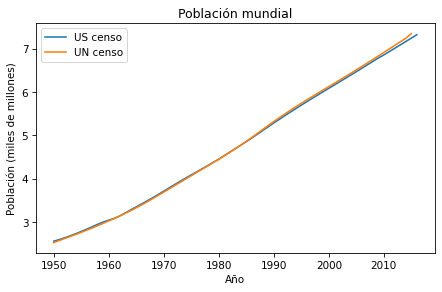

In [ ]:
censo.plot(label="US censo")
un.plot(label="UN censo")
ms.decorate(title='Poblaci√≥n mundial', xlabel='A√±o', ylabel='Poblaci√≥n (miles de millones)')

## Modelo cuadr√°tico



##Introducci√≥n

Vamos a modelar los datos hist√≥ricos de poblaci√≥n con una funci√≥n cuadr√°tica. La funci√≥n cuadr√°tica que usaremos es `Œ±x(t) + Œ≤x(t)^2 = x(t+1)`. El par√°metro beta se agrega al modelo y es un par√°metro que se mide distinto a alpha. Adem√°s es el par√°metro que multiplica a la variable cuadr√°tica, por lo que su valor influye mucho en la ecuaci√≥n.\
Alpha y beta modifican a la ecuaci√≥n del modelo de forma diferente y se mantienen constantes para todos los a√±os, es decir, modifican a la curva en su totalidad.\
Definimos una funci√≥n de actualizaci√≥n cuadr√°tica:

In [ ]:
def step_cuadratico(poblacion, t, sistema):
    crecimiento_neto = sistema.alpha * poblacion[t] + sistema.beta * poblacion[t]**2
    return poblacion[t] + crecimiento_neto

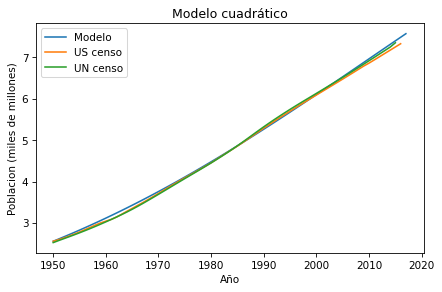

In [ ]:
## Funci√≥n de Simulaci√≥n

def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado

def plot_resultado(censo, un, resultado, titulo):
    resultado.plot(label="Modelo")
    censo.plot(label="US censo")
    un.plot(label="UN censo")
    ms.decorate(title=titulo, xlabel='A√±o', ylabel='Poblacion (miles de millones)')


t_0 = 1950
t_end = 2016
p_0 = censo[t_0]
p_end = censo[t_end]

diferencia_tiempo = t_end - t_0
crecimiento_total = p_end - p_0
crecimiento_anual = crecimiento_total / diferencia_tiempo

sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        alpha = 0.025,
        beta = -0.0018)

#sistema.alpha = 0.025
#sistema.beta = -0.0018

res = run_simulation(sistema, step_cuadratico)
plot_resultado(censo, un, res, "Modelo cuadr√°tico")

Como mejora, podr√≠amos encontrar valores de alpha y/o beta que aproximen m√°s la curva, ya sea agregando m√°s decimales de precisi√≥n a los par√°metros o haciendo un barrido de ellos.

In [ ]:
#def plot_resultado(resultado, titulo):
 #   resultado.plot(label="Modelo")
#plot_resultado(res,"Modelo con crecimiento cuadr√°tico")

Analizar como es el crecimiento de la poblaci√≥n a√±o a a√±o, por la gr√°fica sabemos que es un creciemiento neto positivo. Analizamos si crece m√°s o menos en relaci√≥n al a√±o anterior.

In [ ]:
def step_cuadratico(pop, t, sistema):
    crecimiento_neto = sistema.alpha * pop[t] + sistema.beta * pop[t]**2
    print("A√±o", t,"Poblaci√≥n {:.3f} Crecimiento neto {:.4f}".format(pop[t], crecimiento_neto))
    return pop[t] + crecimiento_neto
res = run_simulation(sistema, step_cuadratico)

A√±o 1950.0 Poblaci√≥n 2.558 Crecimiento neto 0.0522
A√±o 1951.0 Poblaci√≥n 2.610 Crecimiento neto 0.0530
A√±o 1952.0 Poblaci√≥n 2.663 Crecimiento neto 0.0538
A√±o 1953.0 Poblaci√≥n 2.717 Crecimiento neto 0.0546
A√±o 1954.0 Poblaci√≥n 2.771 Crecimiento neto 0.0555
A√±o 1955.0 Poblaci√≥n 2.827 Crecimiento neto 0.0563
A√±o 1956.0 Poblaci√≥n 2.883 Crecimiento neto 0.0571
A√±o 1957.0 Poblaci√≥n 2.940 Crecimiento neto 0.0579
A√±o 1958.0 Poblaci√≥n 2.998 Crecimiento neto 0.0588
A√±o 1959.0 Poblaci√≥n 3.057 Crecimiento neto 0.0596
A√±o 1960.0 Poblaci√≥n 3.116 Crecimiento neto 0.0604
A√±o 1961.0 Poblaci√≥n 3.177 Crecimiento neto 0.0613
A√±o 1962.0 Poblaci√≥n 3.238 Crecimiento neto 0.0621
A√±o 1963.0 Poblaci√≥n 3.300 Crecimiento neto 0.0629
A√±o 1964.0 Poblaci√≥n 3.363 Crecimiento neto 0.0637
A√±o 1965.0 Poblaci√≥n 3.427 Crecimiento neto 0.0645
A√±o 1966.0 Poblaci√≥n 3.491 Crecimiento neto 0.0653
A√±o 1967.0 Poblaci√≥n 3.557 Crecimiento neto 0.0661
A√±o 1968.0 Poblaci√≥n 3.623 Crecimiento neto 

Para entender vamos a crear una arreglo con poblaciones que simulen las nuestras y un arreglo de crecimientos netos calculados con la misma ecuaci√≥n (cuadr√°tica)



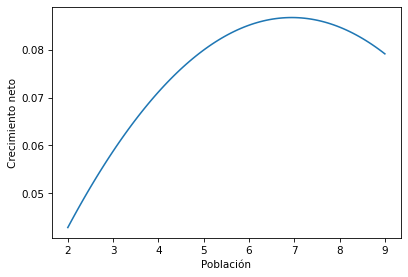

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

arreglo_pob = ms.linspace(2,9,100) #cambiamos a 9
crecimiento_neto = sistema.alpha * arreglo_pob + sistema.beta * arreglo_pob**2


plt.plot(arreglo_pob,crecimiento_neto)
plt.xlabel('Poblaci√≥n')
plt.ylabel('Crecimiento neto')
#plt.title('T√≠tulo')
plt.show()

La poblaci√≥n aumenta hasta que llega al m√°ximo.

Luego del m√°ximo de la par√°bola la tasa de crecimiento de la poblaci√≥n empieza a **decrecer** (ver gr√°fico hasta 9 mil millones de habitantes). Ahora extendemos la poblaci√≥n hasta 14 mil millones de habitantes.




Text(0, 0.5, 'Crecimiento neto')

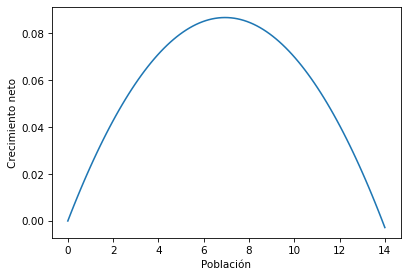

In [ ]:
arreglo_pob = ms.linspace(0,14,100)
crecimiento_neto = sistema.alpha * arreglo_pob + sistema.beta * arreglo_pob**2

plt.plot(arreglo_pob,crecimiento_neto)
plt.xlabel('Poblaci√≥n')
plt.ylabel('Crecimiento neto')

Cuando la poblaci√≥n llega a 14 mil millones de habitantes es cuando el crecimiento llega a cero. Si tiene un creciemiento neto cero, como ser√° la poblaci√≥n al sgte. a√±o?.\
Y si la poblaci√≥n supera los 14 mil millones?


Text(0, 0.5, 'Crecimiento neto')

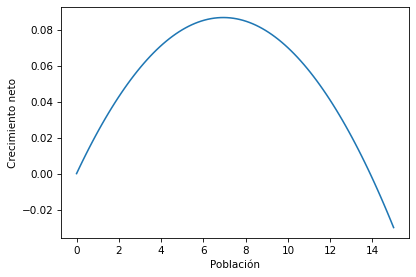

In [ ]:
arreglo_pob = ms.linspace(0,15,100)
crecimiento_neto = sistema.alpha * arreglo_pob + sistema.beta * arreglo_pob**2
plt.plot(arreglo_pob,crecimiento_neto)
plt.xlabel('Poblaci√≥n')
plt.ylabel('Crecimiento neto')

Interpretaci√≥n: el crecimiento neto es negativo. Aumenta la mortalidad y la poblaci√≥n se va reduciendo a√±o a a√±o.

Con ambos gr√°ficos obtenemos m√°s informaci√≥n y podr√≠amos hacer una estimaci√≥n de los pr√≥ximos a√±os. Con el segundo (crecimiento neto) podemos observar que en los proximos a√±os va a seguir creciendo la poblaci√≥n pero cada vez va a ir creciendo menos hasta que llegue un punto que va a dejar de crecer. Si la poblaci√≥n sigue aumentando, se empezar√° a reducir. Esto se ve reflejado en el segundo gr√°fico en el momento en el que el crecimiento neto es negativo.


Grafiquemos qu√© pasa en nuestro modelo.

A√±o 1950.0 Poblaci√≥n 2.558 Crecimiento neto 0.0522
A√±o 1951.0 Poblaci√≥n 2.610 Crecimiento neto 0.0530
A√±o 1952.0 Poblaci√≥n 2.663 Crecimiento neto 0.0538
A√±o 1953.0 Poblaci√≥n 2.717 Crecimiento neto 0.0546
A√±o 1954.0 Poblaci√≥n 2.771 Crecimiento neto 0.0555
A√±o 1955.0 Poblaci√≥n 2.827 Crecimiento neto 0.0563
A√±o 1956.0 Poblaci√≥n 2.883 Crecimiento neto 0.0571
A√±o 1957.0 Poblaci√≥n 2.940 Crecimiento neto 0.0579
A√±o 1958.0 Poblaci√≥n 2.998 Crecimiento neto 0.0588
A√±o 1959.0 Poblaci√≥n 3.057 Crecimiento neto 0.0596
A√±o 1960.0 Poblaci√≥n 3.116 Crecimiento neto 0.0604
A√±o 1961.0 Poblaci√≥n 3.177 Crecimiento neto 0.0613
A√±o 1962.0 Poblaci√≥n 3.238 Crecimiento neto 0.0621
A√±o 1963.0 Poblaci√≥n 3.300 Crecimiento neto 0.0629
A√±o 1964.0 Poblaci√≥n 3.363 Crecimiento neto 0.0637
A√±o 1965.0 Poblaci√≥n 3.427 Crecimiento neto 0.0645
A√±o 1966.0 Poblaci√≥n 3.491 Crecimiento neto 0.0653
A√±o 1967.0 Poblaci√≥n 3.557 Crecimiento neto 0.0661
A√±o 1968.0 Poblaci√≥n 3.623 Crecimiento neto 

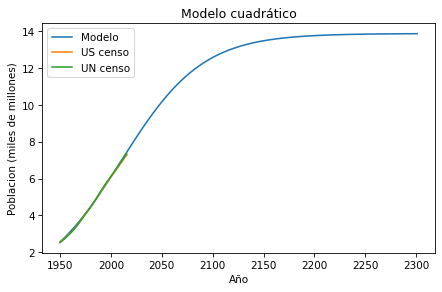

In [ ]:
t_0 = 1950
t_end = 2016
p_0 = censo[t_0]
p_end = censo[t_end]

diferencia_tiempo = t_end - t_0
crecimiento_total = p_end - p_0
crecimiento_anual = crecimiento_total / diferencia_tiempo

sistema = ms.System(
        t_0 = t_0,
        t_end = 2300,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01,
        alpha = 0.025,
        beta = -0.0018)

#sistema.alpha = 0.025
#sistema.beta = -0.0018

res = run_simulation(sistema, step_cuadratico)
plot_resultado(censo, un, res, "Modelo cuadr√°tico")

El modelo muestra una as√≠ntota en 14 mil millones de habitantes. Esto demuestra que la poblaci√≥n no seguir√° aumentando a partir de ese valor. Esto hace referencia a que nos encontramos en un valor de poblaci√≥n l√≠mite, denominado tambi√©n, capacidad de carga del modelo, es una estabilizaci√≥n del modelo.

Volvamos a analizar el gr√°fico del crecimiento neto. A medida que avanzamos en los valores de poblaci√≥n (aumenta) el incremento de la poblaci√≥n a√±o a a√±o es cada vez menor, ya que se va acercando al valor K, cuando alcanza este valor de poblaci√≥n (14 mil millones), el creciemiento neto es nulo. Si la poblaci√≥n sigue aumentando en su valor, el crecimiento neto empieza a ser negativo y la poblaci√≥n empieza a disminuir.

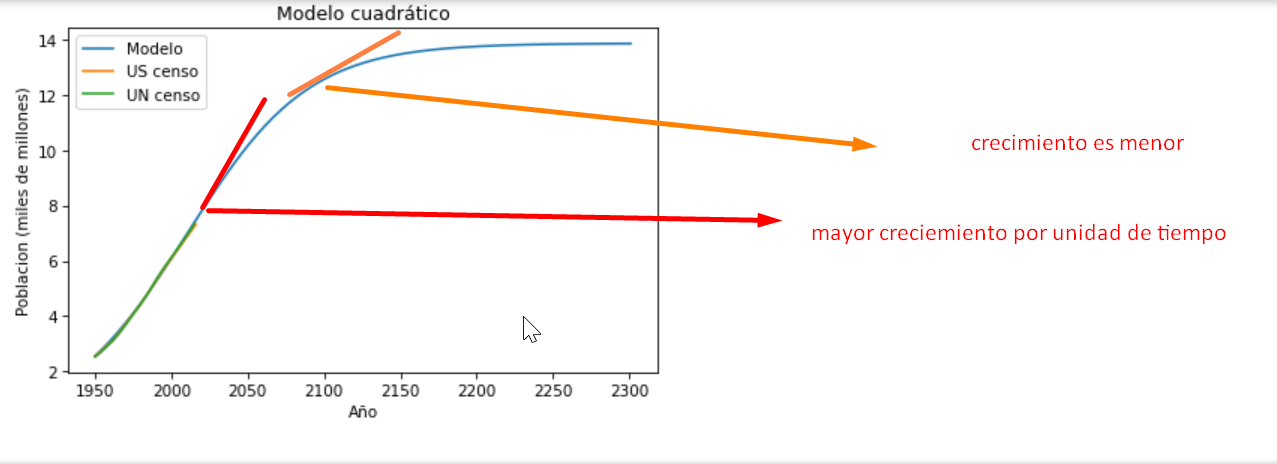
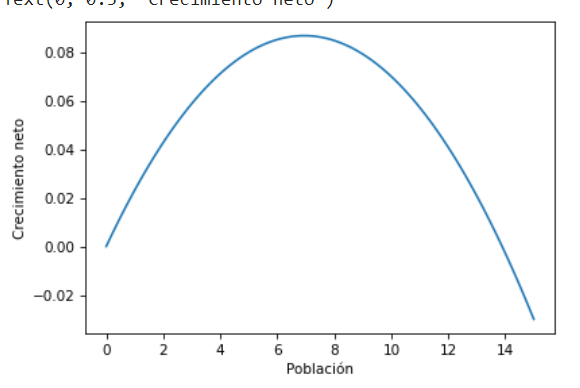

### Funci√≥n cuadr√°tica de poblaci√≥n

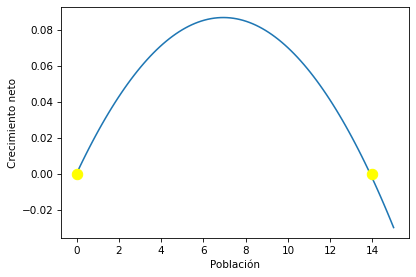

In [ ]:
arreglo_pob = ms.linspace(0,15,100)
crecimiento_neto = sistema.alpha * arreglo_pob + sistema.beta * arreglo_pob**2
plt.plot(arreglo_pob,crecimiento_neto)
plt.xlabel('Poblaci√≥n')
plt.ylabel('Crecimiento neto')
plt.plot([0], [0], 'o', color='yellow', ms=10)
plt.plot([14], [0], 'o', color='yellow', ms=10)

Encontrar anal√≠ticamente estos valores, deber√≠amos encontrar las ra√≠ces de la ecuaci√≥n cuadr√°tica:

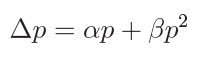

##Predicciones y proyecciones

Se ejecuta una simulaci√≥n con el modelo cuadr√°tico proyectando como t_final el a√±o 2250 y luego con t_final el a√±o 2350.


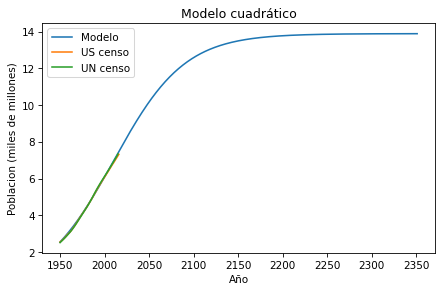

In [ ]:
def step_cuadratico(pop, t, sistema):
    crecimiento_neto = sistema.alpha * pop[t] + sistema.beta * pop[t]**2
    return pop[t] + crecimiento_neto


### Simulaci√≥n
def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado

def plot_resultado(censo, un, resultado, titulo):
    resultado.plot(label="Modelo")
    censo.plot(label="US censo")
    un.plot(label="UN censo")
    ms.decorate(title=titulo, xlabel='A√±o', ylabel='Poblacion (miles de millones)')


t_0 = 1950
#t_end =
p_0 = censo[t_0]
p_end = censo[t_end]

diferencia_tiempo = t_end - t_0
crecimiento_total = p_end - p_0
crecimiento_anual = crecimiento_total / diferencia_tiempo

sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01)

sistema.alpha = 0.025
sistema.beta = -0.0018
sistema.t_end = 2350

res = run_simulation(sistema, step_cuadratico)
plot_resultado(censo, un, res, "Modelo cuadr√°tico")

Seg√∫n nuestro modelo, en un futuro la poblaci√≥n se quedar√≠a en 14 mil millones de habitantes. Se hace asint√≥tica en la capacidad de carga del sistema.

Qu√© pasa si empezamos con una poblaci√≥n mas grande?

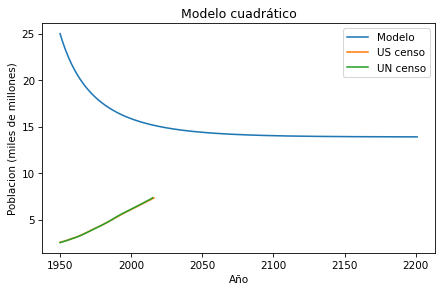

In [ ]:
sistema = ms.System(
        t_0 = t_0,
        t_end = t_end,
        crecimiento_anual = crecimiento_anual,
        p_0 = p_0,
        tasa_nat = 0.027,
        tasa_mort = 0.01)

sistema.alpha = 0.025
sistema.beta = -0.0018
sistema.t_end = 2200
sistema.p_0 = 25

res = run_simulation(sistema, step_cuadratico)
plot_resultado(censo, un, res, "Modelo cuadr√°tico")

Disminuye mas r√°pidamente cuando el valor de la poblaci√≥n es mayor, hasta llegar a cero cerca de los 14 mil millones. Mientras m√°s grande es el valor negativo, m√°s r√°pido disminuye, hasta que va llegando a un valor donde empieza a disminuir menos y estabilizarse en el valor 13.9 y se queda asintotico.

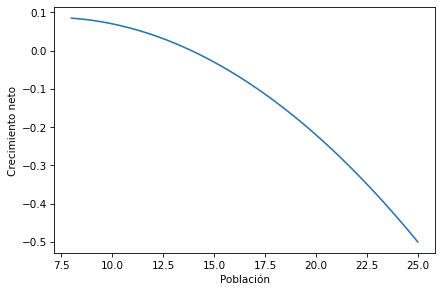

In [ ]:
arreglo_pob = ms.linspace(25,8,100)
crecimiento_neto = sistema.alpha * arreglo_pob + sistema.beta * arreglo_pob**2
plt.plot(arreglo_pob, crecimiento_neto)
ms.decorate(xlabel="Poblaci√≥n", ylabel="Crecimiento neto")

La poblaci√≥n empieza a disminuir, se reduce a√±o a a√±o, ya que el crecieminto neto es negativo.

Ejercicio:
Arreglo de poblaciones desde 0 a 30.
cdo la poblacion es menor al inicio crece mas rapidamente que las que empiezan desde un valor mas grande, ya que su incrementeo es menor que antes.


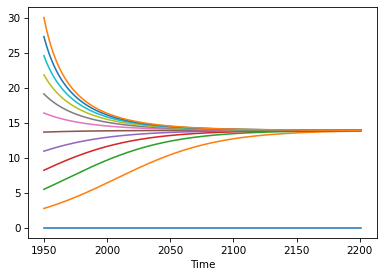

In [ ]:
arreglo_pob = ms.linspace(0,30,12)
crecimiento_neto = sistema.alpha * arreglo_pob + sistema.beta * arreglo_pob**2

for sistema.p_0 in arreglo_pob:
    res = run_simulation(sistema, step_cuadratico)
    res.plot()

#plt.legend()

#ms.decorate(xlabel="a√±o", ylabel="Poblaci√≥n")

El cero, cdo es cero no crece y se mantiene as√≠.
A medida que aumento la poblaci√≥n inicial el crecimiento es menor porque estoy cerca de la capacidad de carga.
La cacapidad de carga se calcula -a/b. Depende de estos valores, por lo tanto no todos los modelos cuadr√°ticos llegan a la misma capacida de carga.

que el crecieminto neto se este reduciendo pueden pasar dos cosas:
o que se este reduciendo la tasa de natalidad o aumente la mortalidad.
hay estimaciones que la tasa d emortalidad no se esta aumentando, al contrario, ha disminuido.
Lo que ha pasado es que la tasa d enatalidad esta disminuyendo.
La estimaci√≥n hecha a futuro, puede que no sea tan exacta.


Volviendo a nuestra poblaci√≥n, que empieza desde 2 mil millones.

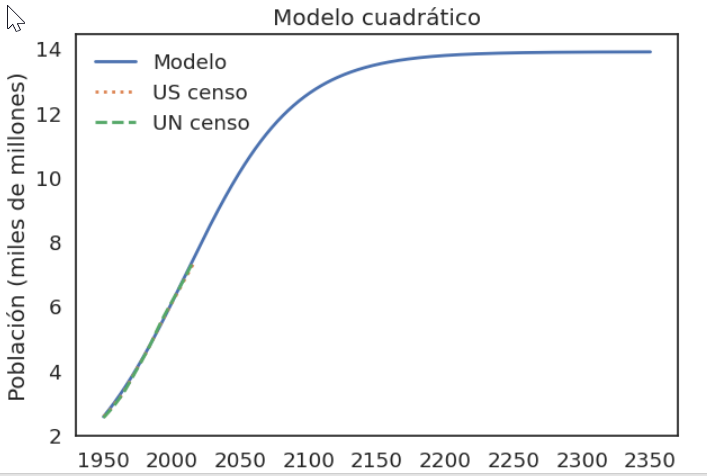

Cuando hacemos que el modelo calcule valores m√°s all√° de los hist√≥ricos, estamos proyectando nuestro modelo a a√±os futuros. Esta es una forma de estimar la poblaci√≥n futura.\
Una conclusi√≥n que podemos nombrar es que llegaremos a la carga del sistema o a la poblaci√≥n l√≠mite cerca del a√±o 2150.\
Se habla de *proyeccci√≥n del modelo* y no de predicci√≥n porque es lo que se espera que ocurra en el futuro si las condiciones actuales se mantienen. Una predicci√≥n es algo mas certero y preciso.\
La proyeccci√≥n queda abierta a que puedan cambiar las condiciones, nuevos descubrientos, cambien tasas, cambie el ambiente.
Factores clim√°ticos no estan incluidos.

##Diferencias relativas

Para encontrar un nuevo modelo que nos calcule la poblaci√≥n ...

Es una medida que se utiliza para comparar dos valores en relaci√≥n a uno de ellos como referencia. De esta manera se encuentra la relaci√≥n entre ellos.

Permite cambiar la funcion de actualizaci√≥n para que el modelo obtenga mejores resultados.
La diferencias relativas, es la diferencia de un valor con respecto al anterior. La variaci√≥n, que se puede expresar en porcentaje, del valor anterior con el actual.

‚Ü™ Diferencia Relativa = (Valor Nuevo - Valor Base) / Valor Base

In [ ]:
import numpy as np
lista=[1.0, 2, 1, 2, 1, 2,4, 5, 4, 5, 8]
lista = np.array(lista)
type(lista)

numpy.ndarray

In [ ]:
abs_diffs = np.ediff1d(lista, to_end=0)

In [ ]:
abs_diffs

array([ 1., -1.,  1., -1.,  1.,  2.,  1., -1.,  1.,  3.,  0.])

In [ ]:
rel_diffs = abs_diffs / lista

In [ ]:
rel_diffs

array([ 1.  , -0.5 ,  1.  , -0.5 ,  1.  ,  1.  ,  0.25, -0.2 ,  0.25,
        0.6 ,  0.  ])

#### Calcular las DiffR de los datos hist√≥ricos.

Calculamos la diferencia relativa para los valores del censo y la diferencia relativa para los valores de las un.\
Obtendremos dos gr√°ficas con el c√°lculo de las diferencias a√±o a a√±o.

In [ ]:
dif_abs_censo = np.ediff1d(censo, to_end=0)
dif_relativas_censo = dif_abs_censo / censo

dif_abs_un = np.ediff1d(un, to_end=0)
dif_relativas_un = dif_abs_un /un

In [ ]:
print(dif_abs_censo)

[0.03731122 0.04183243 0.04528108 0.04817472 0.05187084 0.05320073
 0.05605004 0.05678753 0.05257934 0.04228492 0.04096542 0.05612629
 0.06973466 0.07137342 0.06922449 0.07025213 0.06965579 0.07198011
 0.07484523 0.07553869 0.07762921 0.0762417  0.07552779 0.07451237
 0.07247442 0.07110178 0.07189957 0.07202117 0.07490819 0.07234879
 0.08304739 0.08015644 0.08117018 0.07883265 0.08189331 0.08410853
 0.08662926 0.08735667 0.08688294 0.08751582 0.08262999 0.08455036
 0.08213204 0.08041382 0.08052085 0.08023761 0.07853195 0.07724071
 0.07686167 0.07649646 0.07664786 0.0767971  0.07657461 0.07710855
 0.07734522 0.0782188  0.07865022 0.07913602 0.07916461 0.07037036
 0.07741474 0.07787182 0.07825678 0.07784009 0.0779246  0.07810392
 0.        ]


In [ ]:
print(dif_relativas_censo)
print(dif_relativas_un)

Year
1950    0.014588
1951    0.016121
1952    0.017173
1953    0.017962
1954    0.018999
          ...   
2012    0.011157
2013    0.010976
2014    0.010868
2015    0.010776
2016    0.000000
Name: census, Length: 67, dtype: float64
Year
1950    0.018891
1951    0.018050
1952    0.017781
1953    0.017745
1954    0.017868
          ...   
2012    0.011588
2013    0.011402
2014    0.014590
2015         NaN
2016         NaN
Name: un, Length: 67, dtype: float64


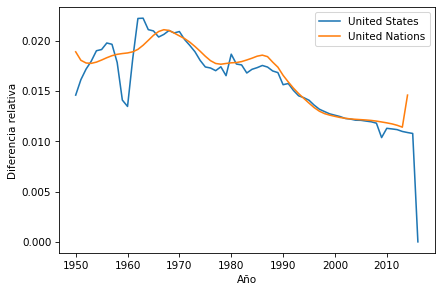

In [ ]:
import matplotlib.pyplot as plt

plt.plot(dif_relativas_censo, label='United States')
plt.plot(dif_relativas_un, label='United Nations')
plt.legend()
ms.decorate(xlabel='A√±o', ylabel='Diferencia relativa')

Se observa que no hay mucho cambio entre las dos gr√°ficas a partir de 1970 aprox. ya no existe mucha variaci√≥n entre ellas. El mayor cambio se ve en los primeros a√±os.
A partir del c√°lculo de las diferencias relativas a√±o a a√±o yo podr√≠a estimar el sgte. a√±o "desconocido para mi" con este valor.\
 ¬øC√≥mo puedo llegar a cononcer el sgte. valor de diferencia relativa si no tengo la poblaci√≥n del 2017?

#### Encontrando patrones dentro de las diferencias relativas - Estimaci√≥n

Al encontrar un patr√≥n en el gr√°fico podr√≠amos modelar las curvas para poder calcular el/los a√±os que desconocemos. As√≠, estimando el sgte. valor de diff relativa podr√≠a con el √∫ltimo valor conocido de poblaci√≥n calcular el sgte.\
Al observar las gr√°ficas se ve que en el centro a partir de 1970 llegan a formar un patr√≥n, que puede ser una recta. Si contin√∫o con esa recta que los modela, podr√≠a decir que en el a√±o 2017 la diff relativa va a ser "x" y podr√≠a calcular la poblaci√≥n de ese a√±o en base a diffrel y la poblaci√≥n anterior.\
De esta manera, obtengo un nuevo modelo de poblaciones, tal como hicimos el modelo, lineal, el proporcional, etc.
Este modelo, basa sus c√°lculos de las poblaciones en base a las diferencias relativas estimadas con el modelo.


Simulamos nuestra recta desde 1970, ya que es donde se va mas linealidad en las curvas de diff relativas. La recta tiene pendiente negativa porque es decreciente, y ordenada al origen b.

In [ ]:
def recta_alpha(t):
    b = 0.02
    m = -0.00021
    return b + m * (t - 1970)

Graficamos la recta

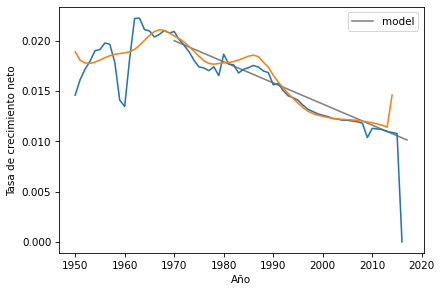

In [ ]:
import matplotlib.pyplot as plt
alpha_censo = dif_relativas_censo
alpha_un = dif_relativas_un

ts = ms.linrange(1970, 2017)

#print(ts)

alpha_model = ms.TimeSeries(recta_alpha(ts), ts)

#print(alpha_model[1975])
plt.plot(alpha_model, color='gray', label='model')
plt.plot(alpha_censo)
plt.plot(alpha_un)
ms.decorate(xlabel='A√±o', ylabel='Tasa de crecimiento neto')

##### Modelamos la poblaci√≥n con la estimaci√≥n de diff relativas calculadas con la recta alpha

Vamos a crear una nueva funci√≥n step() que calcule la poblaci√≥n en base a un alpha que es la diff relativa.


las diferenciass relativas se van a acercando a cero a medida que se acercan a la cap maxima del sistema.

In [ ]:
def step_alpha_diff(pop, t, sistema):
    crecimiento_neto = recta_alpha(t) * pop[t]
    return pop[t] + crecimiento_neto

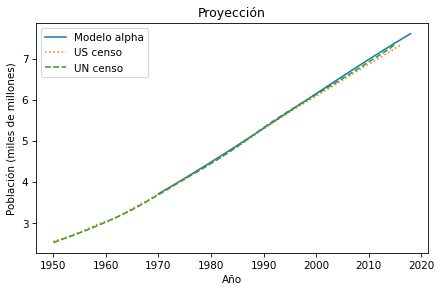

In [ ]:
def recta_alpha(t):
    b = 0.02
    m = -0.00021
    return b + m * (t - 1970)

t_0 = 1970
t_end = 2017
p_0 = censo[t_0]

sistema = ms.System(t_0=t_0,
                t_end=t_end,
                p_0=p_0,
                alpha=0.025, beta=-0.0018,
                funcion_alpha=recta_alpha) #en system agregamos la recta

def step_alphadiff(pop, t, sistema):
    crecimiento_neto = sistema.funcion_alpha(t) * pop[t]
    return pop[t] + crecimiento_neto


def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado

def plot_resultado(censo, un, resultado, titulo):
    plt.plot(resultado, '-', label="Modelo alpha")
    plt.plot(censo, ':', label="US censo")
    plt.plot(un, '--', label="UN censo")
    ms.decorate(title=titulo, xlabel='A√±o', ylabel='Poblaci√≥n (miles de millones)')

resultado_alpha = run_simulation(sistema, step_alphadiff)
plot_resultado(censo, un, resultado_alpha, "Proyecci√≥n" )
#ms.plot(resultado_alpha, label="Alpha")
#ms.decorate(xlabel='A√±o', ylabel ='Poblaci√≥n')
#plot_projecciones(tabla3)

Si lo comparamos con el modelo cuadr√°tico

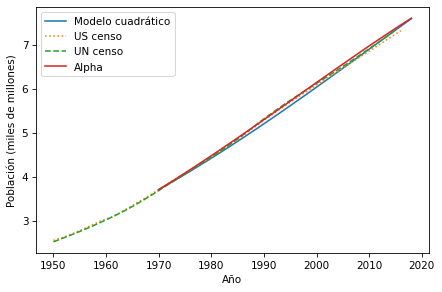

In [ ]:
#C√°lculo de las diferencias relativas


# Definimos la recta

def recta_alpha(t):
    b = 0.02
    m = -0.00021
    return b + m * (t - 1970)

ts = ms.linrange(1960, 2017)
alpha_model = ms.TimeSeries(recta_alpha(ts), ts) #guardamos los valores que calcula la recta a√±o a a√±o

#Graficamos la recta, los valores de diff relativa de censo US y UN
#ms.plot(alpha_model, color='gray', label='model')
#ms.plot(alpha_censo)
#ms.plot(alpha_un)
#ms.decorate(xlabel='A√±o', ylabel='Tasa de crecimiento neto')

t_0 = 1970
t_end = 2017
p_0 = censo[t_0]

sistema = ms.System(t_0=t_0,
                t_end=t_end,
                p_0=p_0,
                alpha=0.025, beta=-0.0018,
                funcion_alpha = recta_alpha) #en system agregamos la recta

def step_alphadiff(pop, t, sistema):
    crecimiento_neto = sistema.funcion_alpha(t) * pop[t]
    return pop[t] + crecimiento_neto


def step_cuadratico(pop, t, sistema):
    crecimiento_neto = sistema.alpha * pop[t] + sistema.beta * pop[t]**2
    return pop[t] + crecimiento_neto


def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado

def plot_resultado(censo, un, resultado, titulo):
    plt.plot(resultado, '-', label="Modelo cuadr√°tico")
    plt.plot(censo, ':', label="US censo")
    plt.plot(un, '--', label="UN censo")
    ms.decorate(title=titulo, xlabel='A√±o', ylabel='Poblaci√≥n (miles de millones)')


resultado_cuad = run_simulation(sistema, step_cuadratico)
resultado_alpha = run_simulation(sistema, step_alphadiff)
# y graficamos los resultados
plot_resultado(censo, un, resultado_cuad, '')
plt.plot(resultado_alpha, label="Alpha")
ms.decorate(xlabel='A√±o')
#plot_projecciones(tabla3)

####Estimaci√≥n de poblaci√≥n a partir de diferencias relativas

Resumen: Creamos una lista de todos los a√±os en los que tenemos datos hist√≥ricos y los que queremos proyectar. Luego modelo las diferencias relativas con una recta. Esto nos devuelve valores que almacenamos en un objeto TimeSeries y obtenemos para cada a√±o cual es la diff relativa con respecto al a√±o anterior.\
Luego, utilizamos la recta para el c√°lculo de la nueva poblaci√≥n. La sgte. poblaci√≥n ser√° la poblacion actual mas un creciemiento neto, que va a estar dado por la poblacion multiplicada por una diff relativa calculada por la recta.

##Proyecciones de expertos

Desde el art√≠culo de wikipedia analizamos las gr√°ficas de estimaciones.

In [ ]:
import pandas as pd

             censo           prb            un
Year                                          
2016  7.334772e+09           NaN  7.432663e+09
2017  7.412779e+09           NaN           NaN
2018  7.490428e+09           NaN           NaN
2019  7.567403e+09           NaN           NaN
2020  7.643402e+09           NaN  7.758157e+09
2021  7.718257e+09           NaN           NaN
2022  7.792021e+09           NaN           NaN
2023  7.864725e+09           NaN           NaN
2024  7.936272e+09           NaN           NaN
2025  8.006581e+09  8.000000e+09  8.141661e+09
2026  8.075716e+09           NaN           NaN
2027  8.143729e+09           NaN           NaN
2028  8.210560e+09           NaN           NaN
2029  8.276191e+09           NaN           NaN
2030  8.340607e+09  8.505000e+09  8.500766e+09
2031  8.403880e+09           NaN           NaN
2032  8.466094e+09           NaN           NaN
2033  8.527246e+09           NaN           NaN
2034  8.587325e+09           NaN           NaN
2035  8.64630

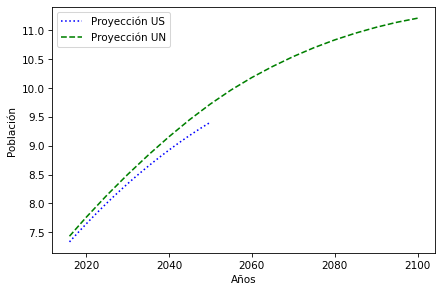

In [ ]:
## proyecciones
import pandas as pd
def read_table3(filename = 'https://en.wikipedia.org/w/index.php?title=Estimates_of_historical_world_population&oldid=938127092'):
    tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
    table3 = tables[3]
    table3.columns = ['censo', 'prb', 'un']
    return table3

tabla3 = read_table3()
print(tabla3)

def plot_projecciones(table):
    censo_proj = table.censo / 1e9
    un_proj = table.un / 1e9

    plt.plot(censo_proj.dropna(), 'b:', label='Proyecci√≥n US')
    plt.plot(un_proj.dropna(), 'g--', label='Proyecci√≥n UN')
    ms.decorate(xlabel="A√±os", ylabel="Poblaci√≥n")

plot_projecciones(tabla3)

In [ ]:
print(tabla3)

             censo           prb            un
Year                                          
2016  7.334772e+09           NaN  7.432663e+09
2017  7.412779e+09           NaN           NaN
2018  7.490428e+09           NaN           NaN
2019  7.567403e+09           NaN           NaN
2020  7.643402e+09           NaN  7.758157e+09
2021  7.718257e+09           NaN           NaN
2022  7.792021e+09           NaN           NaN
2023  7.864725e+09           NaN           NaN
2024  7.936272e+09           NaN           NaN
2025  8.006581e+09  8.000000e+09  8.141661e+09
2026  8.075716e+09           NaN           NaN
2027  8.143729e+09           NaN           NaN
2028  8.210560e+09           NaN           NaN
2029  8.276191e+09           NaN           NaN
2030  8.340607e+09  8.505000e+09  8.500766e+09
2031  8.403880e+09           NaN           NaN
2032  8.466094e+09           NaN           NaN
2033  8.527246e+09           NaN           NaN
2034  8.587325e+09           NaN           NaN
2035  8.64630

##Proyecciones de expertos vs las nuestras üò≤

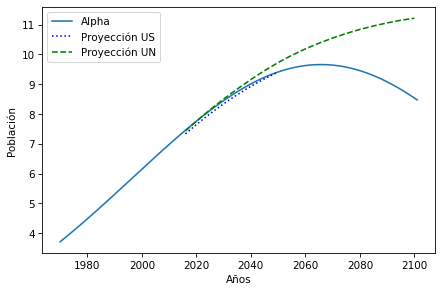

In [ ]:
# Definimos la recta

def recta_alpha(t):
    b = 0.02
    m = -0.00021
    return b + m * (t - 1970)

ts = ms.linrange(1960, 2100)
#print(ts)

alpha_model = ms.TimeSeries(recta_alpha(ts), ts) #guardamos los valores que calcula la recta a√±o a a√±o

t_0 = 1970
t_end = 2100
p_0 = censo[t_0]

sistema = ms.System(t_0=t_0,
                t_end=t_end,
                p_0=p_0,
                alpha=0.025, beta=-0.0018,
                funcion_alpha=recta_alpha) #en system agregamos la recta

def step_alphadiff(pop, t, sistema):
    crecimiento_neto = sistema.funcion_alpha(t) * pop[t]
    return pop[t] + crecimiento_neto


def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado


resultado_alpha = run_simulation(sistema, step_alphadiff)
plt.plot(resultado_alpha, label="Alpha")
ms.decorate(xlabel='A√±o')
plot_projecciones(tabla3)

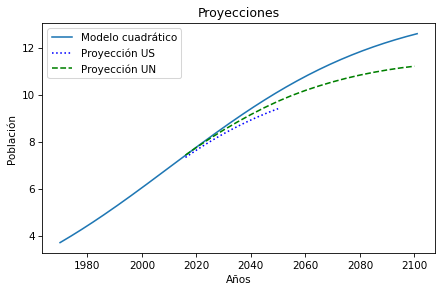

In [ ]:
#CUADR√ÅTICO
t_0 = 1970
t_end = 2100
p_0 = censo[t_0]

sistema = ms.System(t_0=t_0,
                t_end=t_end,
                p_0=p_0,
                alpha=0.025, beta=-0.0018) #en system agregamos la recta


def step_cuadratico(pop, t, sistema):
    crecimiento_neto = sistema.alpha * pop[t] + sistema.beta * pop[t]**2
    return pop[t] + crecimiento_neto


def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado

def plot_resultado(resultado, titulo):
    plt.plot(resultado, '-', label="Modelo cuadr√°tico")
    ms.decorate(title=titulo, xlabel='A√±o', ylabel='Poblaci√≥n (miles de millones)')


resultado_cuad = run_simulation(sistema, step_cuadratico)
plot_resultado(resultado_cuad, 'Proyecciones')
plot_projecciones(tabla3)

El objetivo es plantear/encontrar un modelo que se ajuste bien a los datos hist√≥ricos para despu√©s poder proyectar.


#Ejercicio:
graficar en un mismo gr√°fico las cuatro curvas de proyecciones, el modelo cuadr√°tico, el modelo alpha y los datos de los expertos (dos). Adem√°s, deben visualizarse los datos hist√≥ricos. Responder teniendo en cuenta las proyecciones de los expertos:

1.    ¬øCu√°l ser√° el mejor modelo* para estimar poblaciones en el a√±o 2050?
2.    ¬øCu√°l ser√° el mejor modelo* para estimar poblaciones en el a√±o 2100?

*hace referencia a uno de los que nosotros programamos.

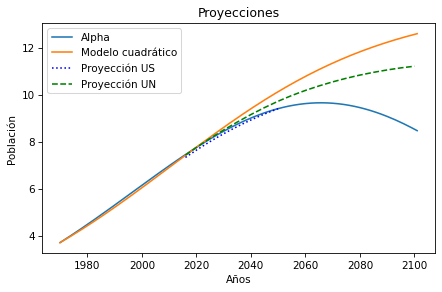

In [ ]:
def recta_alpha(t):
    b = 0.02
    m = -0.00021
    return b + m * (t - 1970)

ts = ms.linrange(1970, 2100)

alpha_model = ms.TimeSeries(recta_alpha(ts), ts) #valores que calculan la recta a√±o a a√±o

t_0 = 1970
t_end = 2100
p_0 = censo[t_0]

sistema = ms.System(t_0=t_0,
                t_end=t_end,
                p_0=p_0,
                alpha=0.025, beta=-0.0018,
                funcion_alpha=recta_alpha) #se agrega la recta en system

def step_alphadiff(pop, t, sistema):
    crecimiento_neto = sistema.funcion_alpha(t) * pop[t]
    return pop[t] + crecimiento_neto


def run_simulation(sistema, step_func):
    resultado = ms.TimeSeries()
    resultado[sistema.t_0] = sistema.p_0
    for t in ms.linrange(sistema.t_0, sistema.t_end):
        resultado[t+1] = step_func(resultado, t, sistema)
    return resultado


resultado_alpha = run_simulation(sistema, step_alphadiff)
plt.plot(resultado_alpha, label="Alpha")
ms.decorate(xlabel='A√±o')

resultado_cuad = run_simulation(sistema, step_cuadratico)
plot_resultado(resultado_cuad, 'Proyecciones')
plot_projecciones(tabla3)

* El modelo alpha se ajusta mejor a los datos historicos a corto y mediano plazo, por lo que para estimar la poblacion del a√±o 2050 seria la mejor opcion para estimar la poblacion.
* Para el caso de la poblacion del a√±o 2100, el modelo cuadratico seria la mejor opcion para realizar una estimacion.